#ODI_cricket_Matches dataset. The dataset contains a match summary of all the ODI's till the year 2017.

In [ ]:
#importing the Variables
import pandas as pd                     
import matplotlib.pyplot as plt   
import numpy as np
import seaborn as sns 

In [ ]:
# initiating the dataset
dataset=pd.read_csv("/content/originalDataset.csv")
dataset.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [ ]:
dataset.shape

(3932, 7)

In [ ]:
#Initiating the null or zero value
dataset.isnull().sum()

Scorecard       0
Team 1          0
Team 2          0
Winner          0
Margin        179
Ground          0
Match Date      0
dtype: int64

In [ ]:
dataset.describe()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
count,3932,3932,3932,3932,3753,3932,3932
unique,3932,24,25,25,227,173,3386
top,ODI # 1,Australia,Sri Lanka,Australia,6 wickets,Sharjah,"Feb 4, 2007"
freq,1,583,508,555,347,228,6


In [ ]:
dataset.columns

Index(['Scorecard', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground',
       'Match Date'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Scorecard   3932 non-null   object
 1   Team 1      3932 non-null   object
 2   Team 2      3932 non-null   object
 3   Winner      3932 non-null   object
 4   Margin      3753 non-null   object
 5   Ground      3932 non-null   object
 6   Match Date  3932 non-null   object
dtypes: object(7)
memory usage: 215.2+ KB


In [ ]:
#ata types
dataset.dtypes

Scorecard     object
Team 1        object
Team 2        object
Winner        object
Margin        object
Ground        object
Match Date    object
dtype: object

In [ ]:
dataset=dataset[dataset.Margin.str.contains("Result")==False]
dataset.value_counts()

Scorecard   Team 1        Team 2       Winner       Margin     Ground       Match Date  
ODI # 1     Australia     England      Australia    5 wickets  Melbourne    Jan 5, 1971     1
ODI # 3360  England       New Zealand  New Zealand  5 wickets  Lord's       May 31, 2013    1
ODI # 3348  South Africa  Pakistan     Pakistan     3 wickets  Durban       Mar 21, 2013    1
ODI # 3349  Sri Lanka     Bangladesh   Sri Lanka    8 wickets  Hambantota   Mar 23, 2013    1
ODI # 335   Pakistan      Sri Lanka    Pakistan     8 wickets  Peshawar     Oct 13, 1985    1
                                                                                           ..
ODI # 2179  India         Pakistan     Pakistan     3 wickets  Birmingham   Sep 19, 2004    1
ODI # 218   New Zealand   Pakistan     Pakistan     11 runs    Nottingham   Jun 20, 1983    1
ODI # 2180  England       Australia    England      6 wickets  Birmingham   Sep 21, 2004    1
ODI # 2181  Pakistan      West Indies  West Indies  7 wickets  So

In [ ]:
#Now lets find out how many matches have each team played .We have two columns with different team names so we will have to conduct proper EDA
group1=dataset.groupby("Team 1").size().rename("Team 1")
group2=dataset.groupby("Team 2").size().rename("Team 2")
total=pd.concat([group1, group2],axis=1).fillna(0)
total["total"]=total["Team 1"]+total["Team 2"]
total.columns
##This gives us to the total matches played by each team . lets draw the seaborn vi0sualization.

Index(['Team 1', 'Team 2', 'total'], dtype='object')

Text(0.5, 1.0, 'ODI Match Played by Teams')

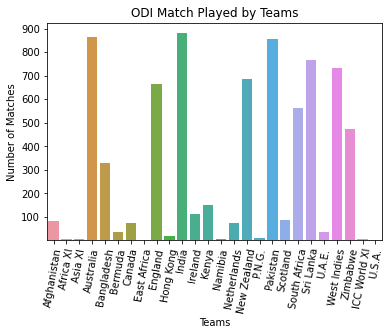

In [ ]:
%matplotlib inline
sns.barplot(x=total.index,y=total["total"])
plt.ylabel("Number of Matches")
plt.xlabel("Teams")
plt.yticks([100,200,300,400,500,600,700,800,900])
plt.xticks(rotation = 80)
plt.title("ODI Match Played by Teams")

In [ ]:
#Calculation about win or loose ratios per team.
dataset["Loser"]=np.where(dataset.Winner==dataset["Team 2"],dataset["Team 1"],dataset["Team 2"])
winners=dataset.groupby("Winner").size().rename("Won")
losers=dataset.groupby("Loser").size().rename("Lost")
comb2=pd.concat([winners,losers],axis=1).fillna(0)
comb2["Win/Loss Ratio"]=comb2["Won"]/comb2["Lost"]
comb2.sort_values("Win/Loss Ratio",ascending = False)
comb2

,Won,Lost,Win/Loss Ratio
Afghanistan,42.0,39,1.076923
Africa XI,1.0,4,0.250000
Asia XI,4.0,2,2.000000
Australia,555.0,307,1.807818
Bangladesh,105.0,223,0.470852
Bermuda,7.0,28,0.250000
Canada,17.0,58,0.293103
England,343.0,321,1.068536
Hong Kong,6.0,11,0.545455
ICC World XI,1.0,3,0.333333


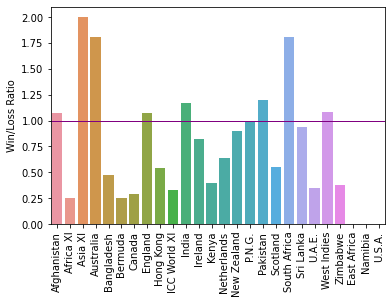

In [ ]:
#Plot Win/Lose Chart
%matplotlib inline
sns.barplot(x=comb2.index,y=comb2["Win/Loss Ratio"])
plt.xticks(rotation ="vertical")
plt.axhline(1,color="purple",linewidth=1)


In [ ]:
#Analyse matches for india by opposition
india_matches=dataset[(dataset["Team 1"]=="India") | (dataset["Team 2"]=="India")]
Win=india_matches.groupby("Winner").size().rename("Losses")
Lost=india_matches.groupby("Loser").size().rename("Wins")
#Concat the two
comb3=pd.concat([Lost,Win],axis=1).fillna(0)
comb3=comb3.nlargest(10,"Wins")
comb3["Win/loss"]=comb3["Wins"]/comb3["Losses"]
comb3=comb3.drop(["India"])
comb3

,Wins,Losses,Win/loss
Sri Lanka,88,54.0,1.629630
West Indies,56,61.0,0.918033
England,52,39.0,1.333333
New Zealand,51,44.0,1.159091
Pakistan,51,72.0,0.708333
Zimbabwe,51,10.0,5.100000
Australia,45,73.0,0.616438
South Africa,29,45.0,0.644444
Bangladesh,27,5.0,5.400000


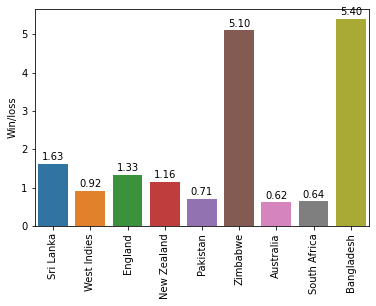

In [ ]:
%matplotlib inline
ax=sns.barplot(x=comb3.index,y=comb3["Win/loss"])

plt.xticks(rotation="vertical")
#Adding annotation
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2),y=height+0.1,
 s = "{:.2f}".format(height),
 ha = "center") 

In [ ]:
dataset.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Loser
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971",England
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972",Australia
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972",England
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972",Australia
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973",Pakistan


In [ ]:
bat_first=dataset.Margin.str.contains("Wickets")
bat_first.value_counts()

False    3753
Name: Margin, dtype: int64

Higher false value indicates the teams that have batted first have won one more occasions than teams that have fielded first.

In [ ]:
#Now lets do a Time Series Analysis
dataset["Year"] = dataset["Match Date"].str.strip().str[-4:]
dataset

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Loser,Year
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971",England,1971
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972",Australia,1972
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972",England,1972
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972",Australia,1972
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973",Pakistan,1973
...,...,...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017",India,2017
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017",Bangladesh,2017
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017",Sri Lanka,2017
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017",New Zealand,2017


Text(0, 0.5, 'Number of Matches')

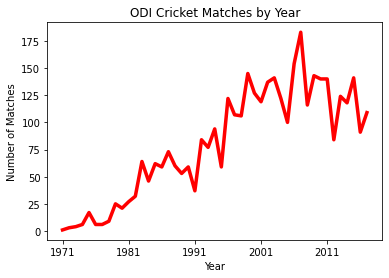

In [ ]:
yeared = dataset.groupby("Year").size()
yeared.plot(kind="line", color="Red",linewidth = 3.5)
plt.title("ODI Cricket Matches by Year")
plt.ylabel("Number of Matches")

# Heatmap

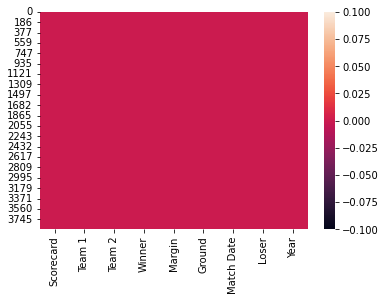

In [ ]:
sns.heatmap(dataset.isnull())
plt.show()